# EDA with graphs

In [2]:
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from textwrap import wrap
# from wordcloud import WordCloud

In [3]:
path = "/workspaces/Shopee-Price-Match-Guarantee/00_source_data/shopee-product-matching/"
path_to_img = path + "train_images/"
path_to_test = path + "test_images/"

In [4]:
num_imgs = len(os.listdir(path_to_img))
print("Number of images in train set: ", num_imgs)

Number of images in train set:  32412


In [5]:
test_df = pd.read_csv(path + "test.csv")
compute_cv = len(test_df) <= 3

if compute_cv:
    train_df = pd.read_csv(path + "train.csv")
    target_dict = train_df.groupby("label_group")["posting_id"].agg("unique").to_dict()
    train_df["target"] = train_df["label_group"].map(target_dict)
    data = train_df
else:
    data = test_df

In [6]:
num_unique_label=len(data["label_group"].unique())
print("Number of unique label groups: ", num_unique_label)

Number of unique label groups:  11014


In [7]:
unique_hash=len(data['image_phash'].unique())
print("Number of unique image phash: ", unique_hash)

Number of unique image phash:  28735


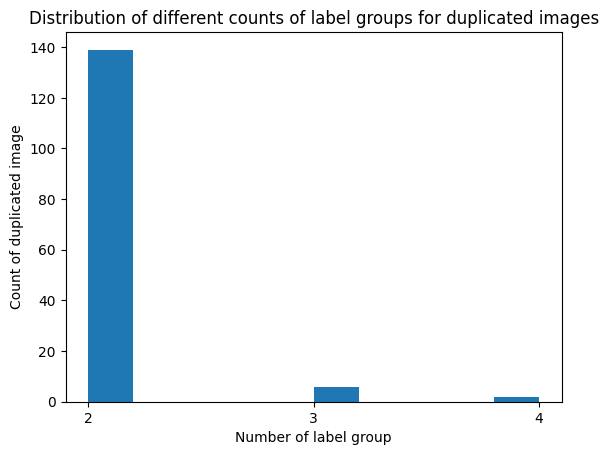

In [8]:
duplicates = data[data.duplicated(subset='image_phash', keep=False)]

# Group duplicates by image_phash, and count the number of unique label_groups for each image_phash
counts = duplicates.groupby('image_phash')['label_group'].nunique()

# Filter the counts to show only the image_phash values that have more than one label_group
counts = counts[counts > 1]

# Plot the histogram
counts_int = counts.values.astype(int)
plt.hist(counts_int, bins=10)
plt.xlabel('Number of label group')
plt.ylabel('Count of duplicated image')
plt.title('Distribution of different counts of label groups for duplicated images')

# Set X axis tick labels to integers only
plt.xticks(np.arange(counts_int.min(), counts_int.max()+1, 1.0))


plt.show()

# Label groups

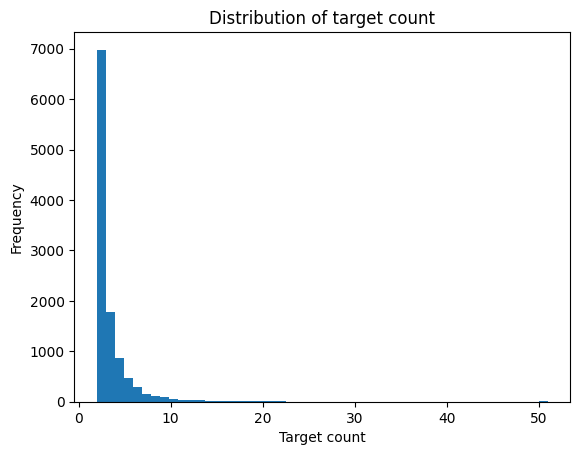

In [9]:

target_counts = data['label_group'].value_counts()

# Plot the distribution of target counts
fig, ax = plt.subplots()
ax.hist(target_counts, bins=50)
ax.set_xlabel('Target count')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of target count')
plt.show()


# Word cloud

In [10]:
# text = ' '.join(data['title'].values)

# # Create a WordCloud object with the desired parameters
# wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Blues', max_words=200).generate(text)

# # Display the WordCloud image
# plt.figure(figsize=(12, 6))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.show()

## Show image in the same class

In [28]:
def show_random_images():
    n_rows, n_cols = 2, 4
    n_images = n_rows * n_cols
    label_groups = np.random.choice(data["label_group"].unique(), size=n_images, replace=False)

    fig, axes = plt.subplots(figsize=(18, 12), nrows=n_rows, ncols=n_cols)
    img_to_show = []
    for label_group in label_groups:
        rows = data[data["label_group"] == label_group].sample(n=2, replace=False)
        img_to_show += rows[["image", "title"]].values.tolist()

    if len(img_to_show) > n_images:
        img_to_show = img_to_show[:n_images]

    for i, (img_path, title) in enumerate(img_to_show):
        img = cv2.imread(os.path.join(path_to_img, img_path))
        title = "\n".join(wrap(title, 24))
        ax = axes.flat[i]
        ax.set_title(title, fontsize=14)
        ax.imshow(img)
        ax.axis("off")

    fig.tight_layout()


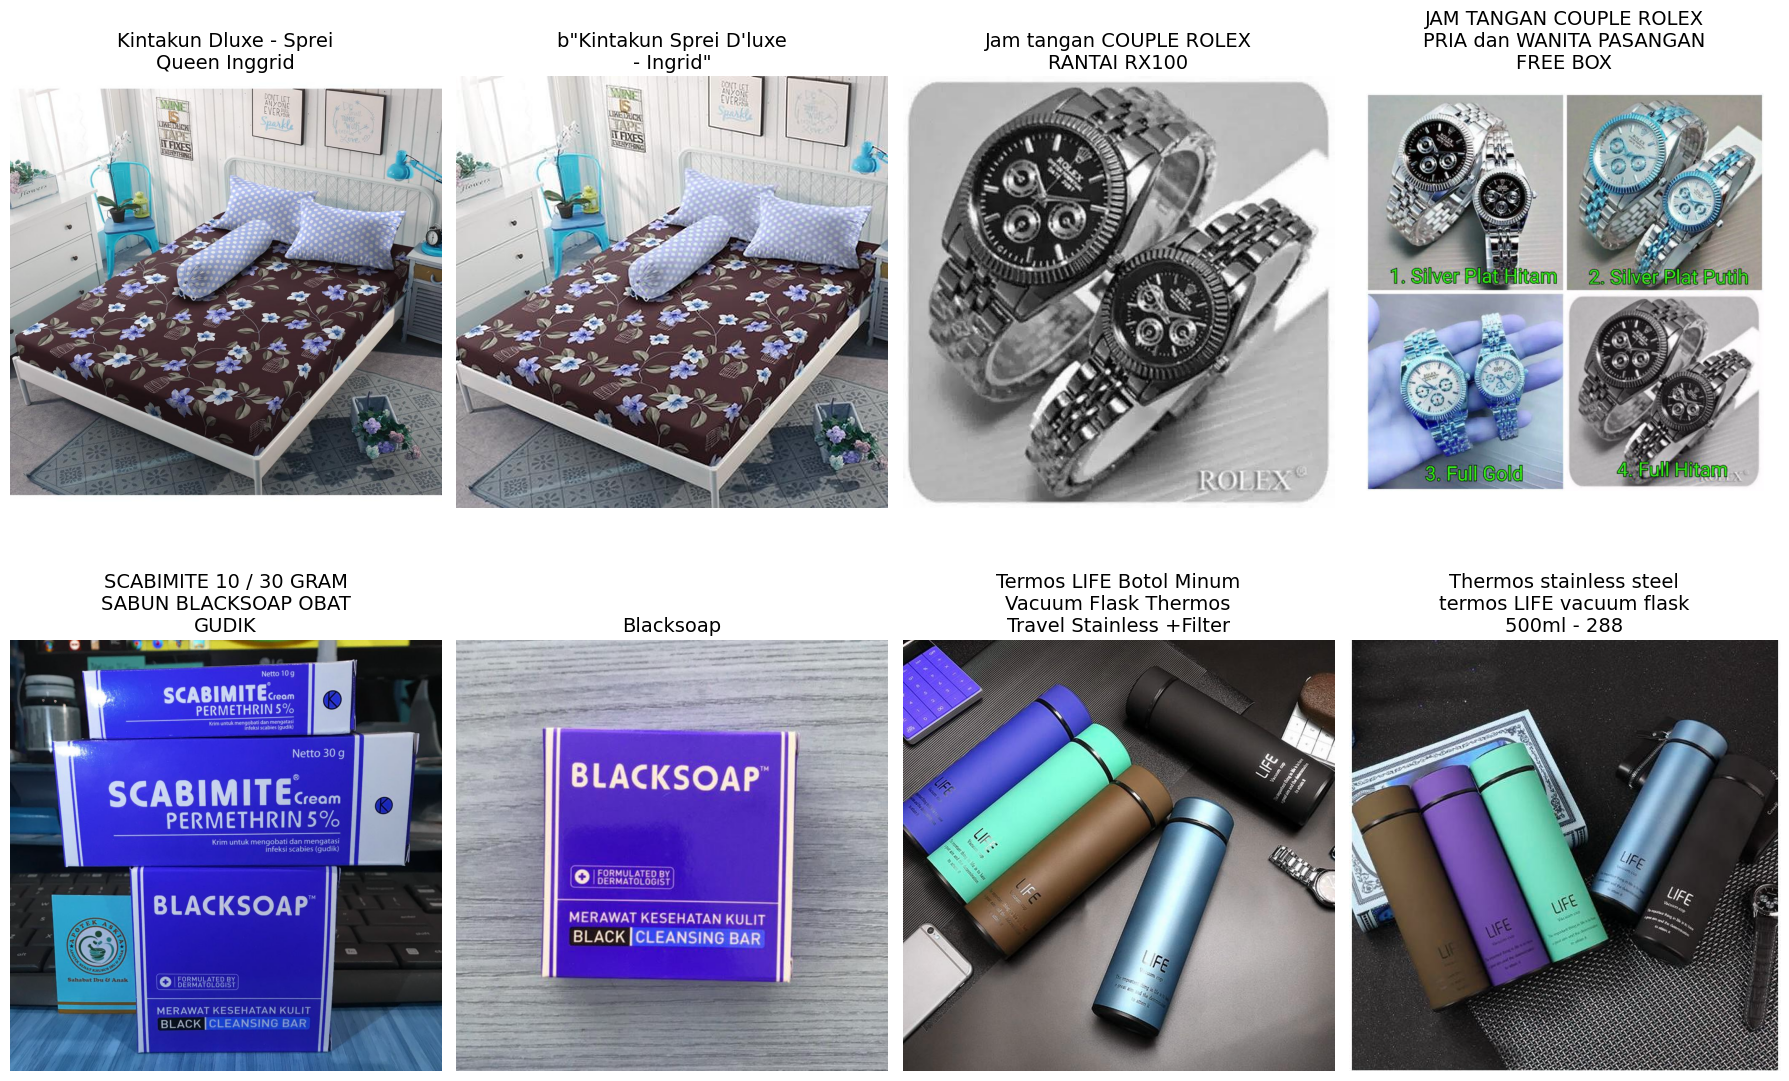

In [29]:
if compute_cv:
    show_random_images()

In [ ]:
# check how